In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vineetkukreti/indian-agriculture-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\SAGA\.cache\kagglehub\datasets\vineetkukreti\indian-agriculture-dataset\versions\1


# Indian Agriculture Dataset EDA 

#### This analysis helps identify regional patterns in crop yield and production, with insights into improving agriculturalstrategies, focusing on high-yield varieties.



In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("ICRISAT-District Level Data.csv")
df.head()

,Dist Code,Year,State Code,State Name,Dist Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),...,SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
0,1,1966,14,Chhattisgarh,Durg,548.0,185.0,337.59,44.0,20.0,...,1777.78,0.0,0.0,0.0,5.95,6.64,12.59,0.01,0.60,0.47
1,1,1967,14,Chhattisgarh,Durg,547.0,409.0,747.71,50.0,26.0,...,1500.00,0.0,0.0,0.0,5.77,7.24,13.02,0.01,0.56,1.23
2,1,1968,14,Chhattisgarh,Durg,556.3,468.0,841.27,53.7,30.0,...,1000.00,0.0,0.0,0.0,5.41,7.40,12.81,0.10,0.58,1.02
3,1,1969,14,Chhattisgarh,Durg,563.4,400.8,711.40,49.4,26.5,...,1900.00,0.0,0.0,0.0,5.52,7.16,12.69,0.01,0.56,0.84
4,1,1970,14,Chhattisgarh,Durg,571.6,473.6,828.55,44.2,29.0,...,2000.00,0.0,0.0,0.0,5.45,7.19,12.64,0.02,0.52,0.42


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16146 entries, 0 to 16145
Data columns (total 80 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Dist Code                                    16146 non-null  int64  
 1   Year                                         16146 non-null  int64  
 2   State Code                                   16146 non-null  int64  
 3   State Name                                   16146 non-null  object 
 4   Dist Name                                    16146 non-null  object 
 5   RICE AREA (1000 ha)                          16146 non-null  float64
 6   RICE PRODUCTION (1000 tons)                  16146 non-null  float64
 7   RICE YIELD (Kg per ha)                       16146 non-null  float64
 8   WHEAT AREA (1000 ha)                         16146 non-null  float64
 9   WHEAT PRODUCTION (1000 tons)                 16146 non-null  float64
 10

In [5]:
### Crop Area Distribution

In [40]:
total_area=df[["RICE AREA (1000 ha)","WHEAT AREA (1000 ha)","MAIZE AREA (1000 ha)"]].sum()
total_area

RICE AREA (1000 ha)     2076265.67
WHEAT AREA (1000 ha)    1244177.59
MAIZE AREA (1000 ha)     324891.75
dtype: float64

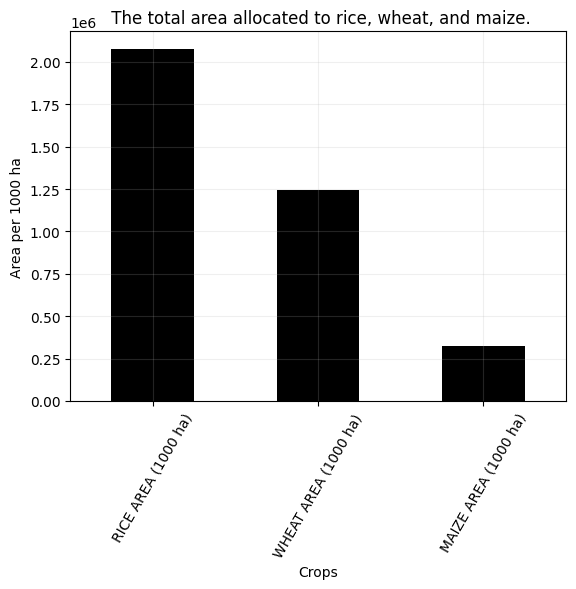

In [45]:
total_area.plot(kind="bar",color="Yellow",facecolor="black")
plt.title(" The total area allocated to rice, wheat, and maize.")
plt.grid(alpha=0.2)
plt.xlabel("Crops")
plt.xticks(rotation=60)
plt.ylabel("Area per 1000 ha")
plt.show()

In [8]:
### Yearly Production

In [9]:
year_dta=df.groupby("Year")["RICE PRODUCTION (1000 tons)"].max().reset_index().sort_values(by="RICE PRODUCTION (1000 tons)",ascending=False)

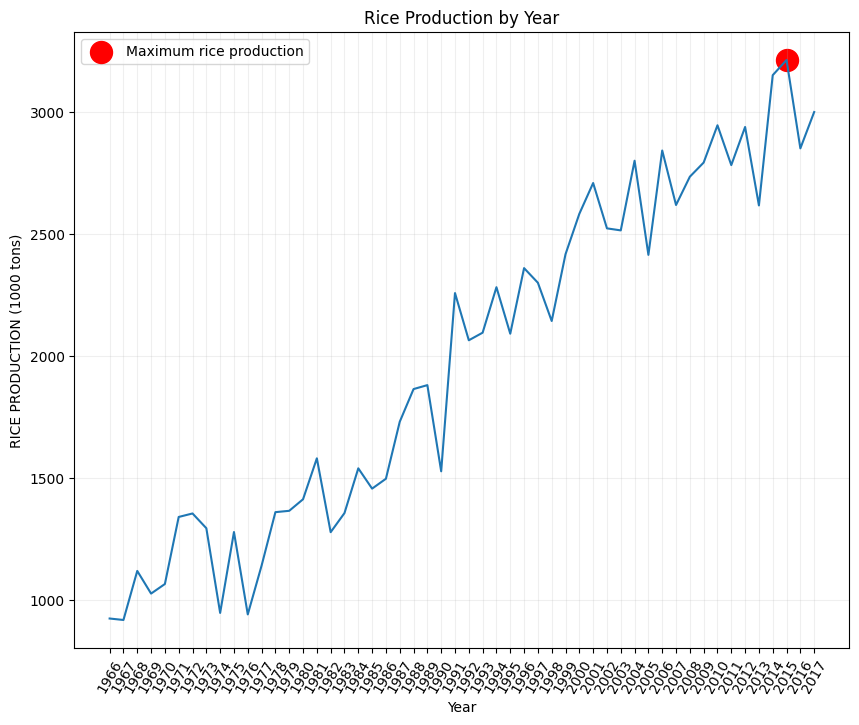

In [53]:
plt.figure(figsize=(10,8))
sns.lineplot(data=year_dta,x='Year',y='RICE PRODUCTION (1000 tons)')
plt.xticks(ticks=year_dta["Year"],rotation=60)
plt.title("Rice Production by Year")
plt.grid(alpha=0.2)
max_in=year_dta["RICE PRODUCTION (1000 tons)"].idxmax()
max_y=year_dta.loc[max_in,"Year"]
max_val=year_dta.loc[max_in,"RICE PRODUCTION (1000 tons)"]
plt.scatter(max_y,max_val,color="red",s=250,marker="o",label="Maximum rice production")
plt.legend()
plt.show()

In [11]:
### State Production

In [12]:
data=df.groupby("State Name")["WHEAT PRODUCTION (1000 tons)"].sum().reset_index().sort_values(by="WHEAT PRODUCTION (1000 tons)",ascending=False)

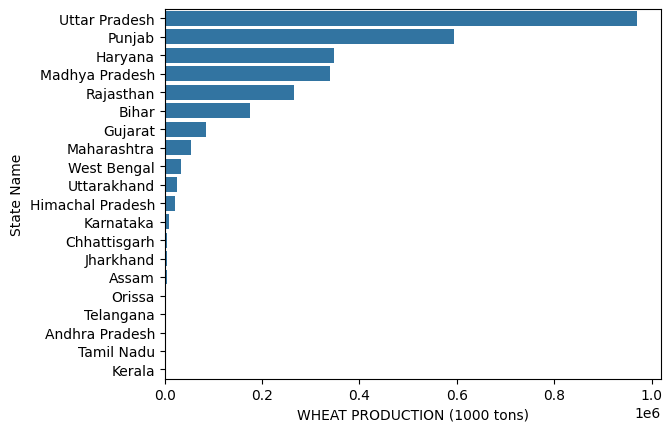

In [13]:
sns.barplot(data=data,x="WHEAT PRODUCTION (1000 tons)",y="State Name")
plt.show()
#### utterpradesh has max wheat production and kerala has leasst

In [14]:
###Crop Yields

In [15]:
df["SORGHUM YIELD (Kg per ha)"].mean()

np.float64(586.0935612535613)

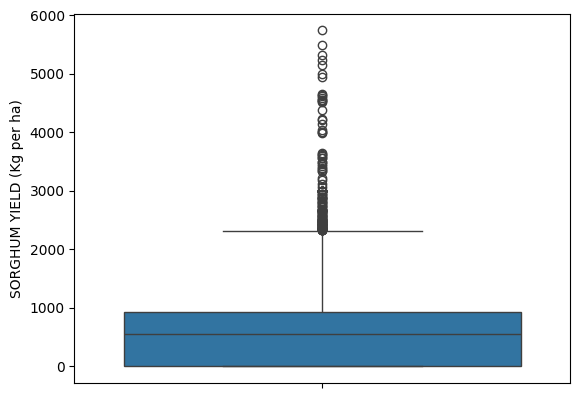

In [16]:
sns.boxplot(df["SORGHUM YIELD (Kg per ha)"])
plt.show()

In [17]:
### Vegetable Area

In [18]:
df["VEGETABLES AREA (1000 ha)"].sum()

np.float64(178998.59)

In [19]:
data1=df.groupby("State Name")["VEGETABLES AREA (1000 ha)"].max().reset_index().sort_values(by="VEGETABLES AREA (1000 ha)",ascending=False)
data1=data1.head(3)


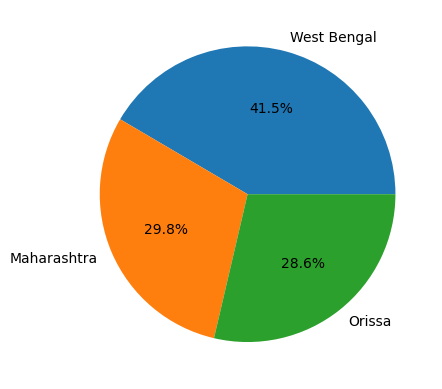

In [20]:
plt.pie(data1["VEGETABLES AREA (1000 ha)"],labels=data1["State Name"] ,autopct = '%.1f%%')
plt.show()

### Medium Questions


In [21]:
###Area vs. Production

In [22]:
df["CHICKPEA AREA (1000 ha)"].corr(df["CHICKPEA PRODUCTION (1000 tons)"])

np.float64(0.9119971581254463)

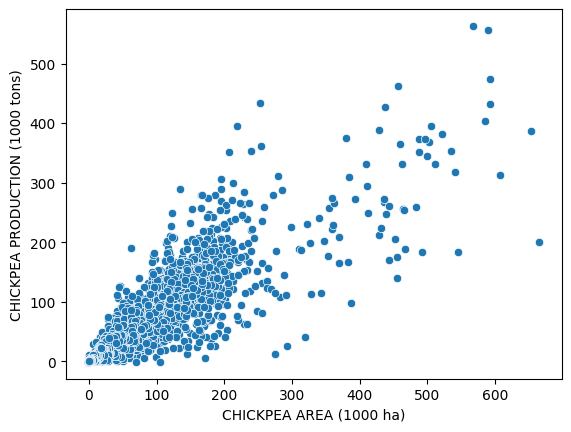

In [23]:
sns.scatterplot(df,x="CHICKPEA AREA (1000 ha)",y="CHICKPEA PRODUCTION (1000 tons)")
plt.show() 

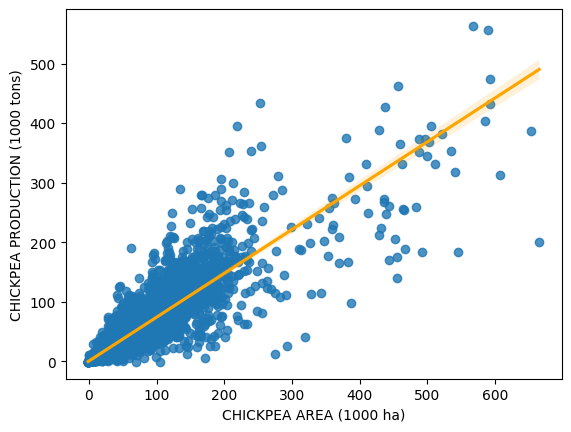

In [24]:
sns.regplot(df,x="CHICKPEA AREA (1000 ha)",y="CHICKPEA PRODUCTION (1000 tons)",line_kws={"color":"orange"})
plt.show() 
###  there is sstrong possitive relation 

In [25]:
### Diversity of Crops

In [26]:
data_crops_production=df.iloc[:,6:73:3]
data_crops_production["State Name"]=df["State Name"]
data_crops_production

,RICE PRODUCTION (1000 tons),WHEAT PRODUCTION (1000 tons),KHARIF SORGHUM PRODUCTION (1000 tons),RABI SORGHUM PRODUCTION (1000 tons),SORGHUM PRODUCTION (1000 tons),PEARL MILLET PRODUCTION (1000 tons),MAIZE PRODUCTION (1000 tons),FINGER MILLET PRODUCTION (1000 tons),BARLEY PRODUCTION (1000 tons),CHICKPEA PRODUCTION (1000 tons),...,RAPESEED AND MUSTARD PRODUCTION (1000 tons),SAFFLOWER PRODUCTION (1000 tons),CASTOR PRODUCTION (1000 tons),LINSEED PRODUCTION (1000 tons),SUNFLOWER PRODUCTION (1000 tons),SOYABEAN PRODUCTION (1000 tons),OILSEEDS PRODUCTION (1000 tons),SUGARCANE PRODUCTION (1000 tons),COTTON PRODUCTION (1000 tons),State Name
0,185.00,20.00,0.40,0.0,0.40,0.00,2.00,0.20,0.0,27.00,...,0.20,0.00,0.2,6.80,0.00,0.00,-1.00,1.6,0.0,Chhattisgarh
1,409.00,26.00,0.90,0.0,0.90,0.00,3.00,0.20,0.1,15.00,...,0.30,0.00,0.1,25.80,0.00,0.00,-1.00,1.2,0.0,Chhattisgarh
2,468.00,30.00,0.40,0.0,0.40,0.00,2.00,0.20,0.1,23.00,...,0.50,0.00,0.3,23.80,0.00,0.00,-1.00,1.0,0.0,Chhattisgarh
3,400.80,26.50,0.60,0.0,0.60,0.00,2.30,0.20,0.1,23.10,...,0.40,0.00,0.1,13.00,0.00,0.00,14.90,1.9,0.0,Chhattisgarh
4,473.60,29.00,0.60,0.0,0.60,0.00,3.30,0.20,0.1,32.60,...,0.40,0.00,0.1,22.70,0.00,0.00,24.30,1.4,0.0,Chhattisgarh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16141,579.70,1.85,0.00,0.0,0.00,0.00,3.74,0.00,0.0,1.54,...,1.58,0.00,0.0,0.00,0.00,0.00,1.58,0.0,0.0,Jharkhand
16142,586.63,6.65,0.00,0.0,0.00,0.00,3.33,0.00,0.0,1.36,...,0.84,0.00,0.0,0.00,0.00,0.00,0.84,0.0,0.0,Jharkhand
16143,264.71,1.82,0.00,0.0,0.00,0.00,2.72,0.00,0.0,1.12,...,0.95,0.00,0.0,0.00,0.00,0.00,0.95,0.0,0.0,Jharkhand
16144,319.01,0.83,0.00,0.0,0.00,0.00,1.39,0.36,0.0,0.17,...,0.11,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,Jharkhand


In [27]:
data_crops_production_set=data_crops_production.pivot_table(index="State Name",values=data_crops_production.iloc[:,:23],aggfunc="sum")
data_crops_production_set

,BARLEY PRODUCTION (1000 tons),CASTOR PRODUCTION (1000 tons),CHICKPEA PRODUCTION (1000 tons),COTTON PRODUCTION (1000 tons),FINGER MILLET PRODUCTION (1000 tons),GROUNDNUT PRODUCTION (1000 tons),KHARIF SORGHUM PRODUCTION (1000 tons),LINSEED PRODUCTION (1000 tons),MAIZE PRODUCTION (1000 tons),MINOR PULSES PRODUCTION (1000 tons),...,RABI SORGHUM PRODUCTION (1000 tons),RAPESEED AND MUSTARD PRODUCTION (1000 tons),RICE PRODUCTION (1000 tons),SAFFLOWER PRODUCTION (1000 tons),SESAMUM PRODUCTION (1000 tons),SORGHUM PRODUCTION (1000 tons),SOYABEAN PRODUCTION (1000 tons),SUGARCANE PRODUCTION (1000 tons),SUNFLOWER PRODUCTION (1000 tons),WHEAT PRODUCTION (1000 tons)
State Name,,,,,,,,,,,,,,,,,,,,,
Andhra Pradesh,0.00,648.79,9577.14,6444.95,7470.99,57844.81,6195.47,1.30,25242.65,16111.86,...,11386.80,57.30,315185.40,108.41,1076.51,17582.51,24.28,54046.62,4447.78,60.46
Assam,0.00,4.55,66.33,10.25,0.00,0.00,0.00,-117.12,999.71,2577.40,...,0.00,6286.35,165205.95,39.39,357.17,0.00,0.00,2866.35,0.00,3854.11
Bihar,2832.41,15.20,5139.25,29.74,1654.19,42.66,125.48,734.36,67137.23,14221.98,...,0.00,3305.74,231759.00,-260.94,116.28,125.57,2.74,28589.73,453.34,176250.30
Chhattisgarh,250.27,7.42,6228.17,4.31,148.46,1521.35,464.22,1256.04,6999.24,12419.60,...,27.30,1208.30,208208.22,7.48,265.41,531.82,1287.53,511.56,25.02,4438.92
Gujarat,152.60,26764.52,4845.89,31359.57,1475.66,98321.42,11373.12,0.00,24555.53,8831.49,...,4333.60,13575.70,48713.35,7.80,3932.20,16502.39,602.63,51672.90,7.20,85537.63
Haryana,6712.70,4.50,18341.00,9851.23,0.10,253.98,1726.00,4.20,3625.20,819.57,...,0.00,24962.40,107664.90,0.00,69.28,1783.00,0.00,34767.80,80.81,348429.60
Himachal Pradesh,1770.83,-40.00,217.77,-5.82,168.16,24.65,-38.35,48.27,28075.97,858.33,...,-40.00,127.97,5426.01,-5.47,38.13,-38.35,-20.55,170.95,-40.00,22120.16
Jharkhand,283.18,-5.57,1107.69,7.89,1487.70,136.64,14.54,72.44,7296.77,761.19,...,0.00,692.71,76435.78,-142.82,140.18,14.54,2.76,475.33,4.72,3922.80
Karnataka,0.00,900.68,11114.49,6903.80,63473.92,36033.05,35279.76,429.70,75586.69,16456.03,...,42753.83,57.10,146921.56,3081.32,1869.13,77948.62,2873.98,115747.19,10785.87,9715.78


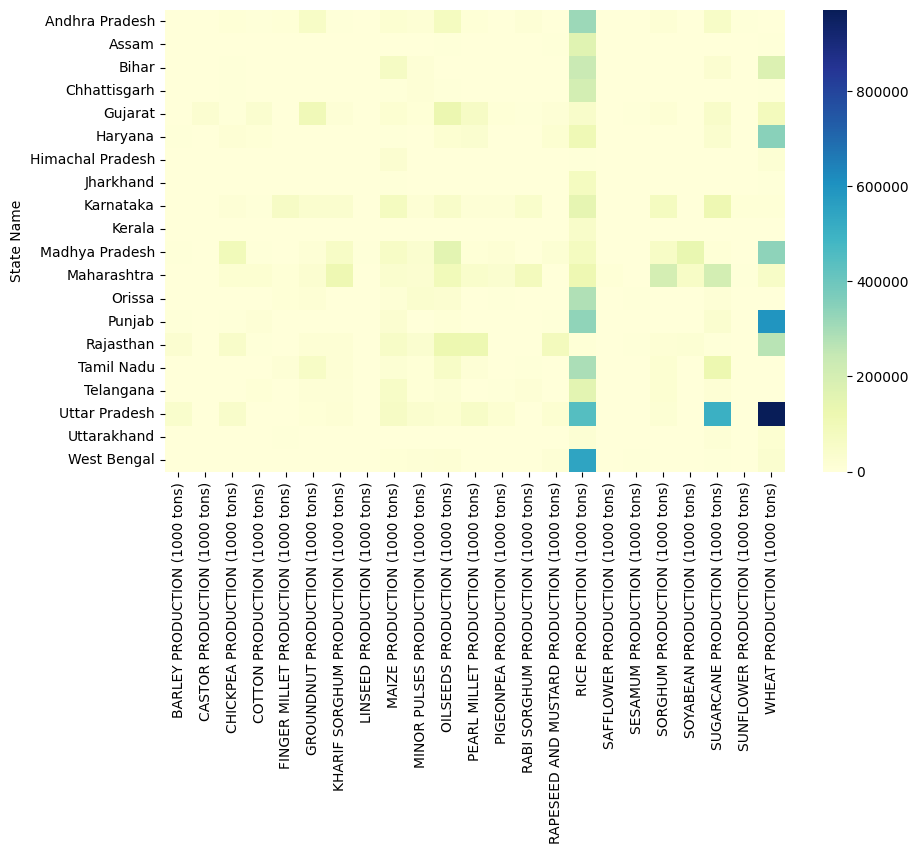

In [28]:
plt.figure(figsize=(10,6))
sns.heatmap(data=data_crops_production_set,cmap="YlGnBu")
plt.show()

#### We  can see that the wheat and Rice  production is collectively  more that other crops

In [29]:
#Hard Questions


In [30]:
### Longitudinal Yield Trends

In [31]:
pulse_crop=df.iloc[:,[1,34,37,40]]
pulse_crop


,Year,CHICKPEA YIELD (Kg per ha),PIGEONPEA YIELD (Kg per ha),MINOR PULSES YIELD (Kg per ha)
0,1966,500.00,405.41,-1.00
1,1967,288.46,722.22,-1.00
2,1968,448.34,784.31,-1.00
3,1969,439.16,764.71,329.67
4,1970,611.63,1057.06,416.86
...,...,...,...,...
16141,2013,939.02,1935.90,781.82
16142,2014,860.76,1753.85,662.50
16143,2015,722.58,1521.74,934.47
16144,2016,1171.23,1510.42,972.56


In [32]:
pulse_integrated=pulse_crop.melt(id_vars="Year",value_vars=pulse_crop.columns[1:4],var_name="Pulse _crops",value_name="Yeild")

In [33]:
pulse_integrated

,Year,Pulse _crops,Yeild
0,1966,CHICKPEA YIELD (Kg per ha),500.00
1,1967,CHICKPEA YIELD (Kg per ha),288.46
2,1968,CHICKPEA YIELD (Kg per ha),448.34
3,1969,CHICKPEA YIELD (Kg per ha),439.16
4,1970,CHICKPEA YIELD (Kg per ha),611.63
...,...,...,...
48433,2013,MINOR PULSES YIELD (Kg per ha),781.82
48434,2014,MINOR PULSES YIELD (Kg per ha),662.50
48435,2015,MINOR PULSES YIELD (Kg per ha),934.47
48436,2016,MINOR PULSES YIELD (Kg per ha),972.56


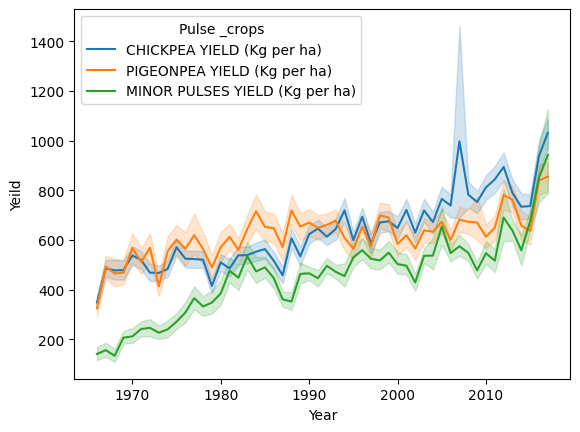

In [34]:
sns.lineplot(data=pulse_integrated,x="Year",y="Yeild",hue="Pulse _crops")
plt.show()

In [35]:
### Sorghum Production Patterns

In [36]:
Planting_patterns=df[["Dist Name","RABI SORGHUM AREA (1000 ha)","KHARIF SORGHUM AREA (1000 ha)"]]
Planting_patterns

,Dist Name,RABI SORGHUM AREA (1000 ha),KHARIF SORGHUM AREA (1000 ha)
0,Durg,0.0,0.60
1,Durg,0.0,1.10
2,Durg,0.0,0.50
3,Durg,0.0,0.80
4,Durg,0.0,0.90
...,...,...,...
16141,Singhbhum,0.0,0.00
16142,Singhbhum,0.0,0.00
16143,Singhbhum,0.0,0.00
16144,Singhbhum,0.0,0.00


In [37]:
Planting_patterns_table=Planting_patterns.pivot_table(index="Dist Name",values=["RABI SORGHUM AREA (1000 ha)","KHARIF SORGHUM AREA (1000 ha)"],aggfunc="sum")
Planting_patterns_table

,KHARIF SORGHUM AREA (1000 ha),RABI SORGHUM AREA (1000 ha)
Dist Name,,
24 Parganas,0.00,0.00
Adilabad,3547.25,4587.43
Agra,116.26,0.00
Ahmedabad,2103.47,50.89
Ahmednagar,384.60,28128.60
...,...,...
Warangal,1400.12,2461.12
Wardha,3937.00,61.90
West Dinajpur,0.00,0.03


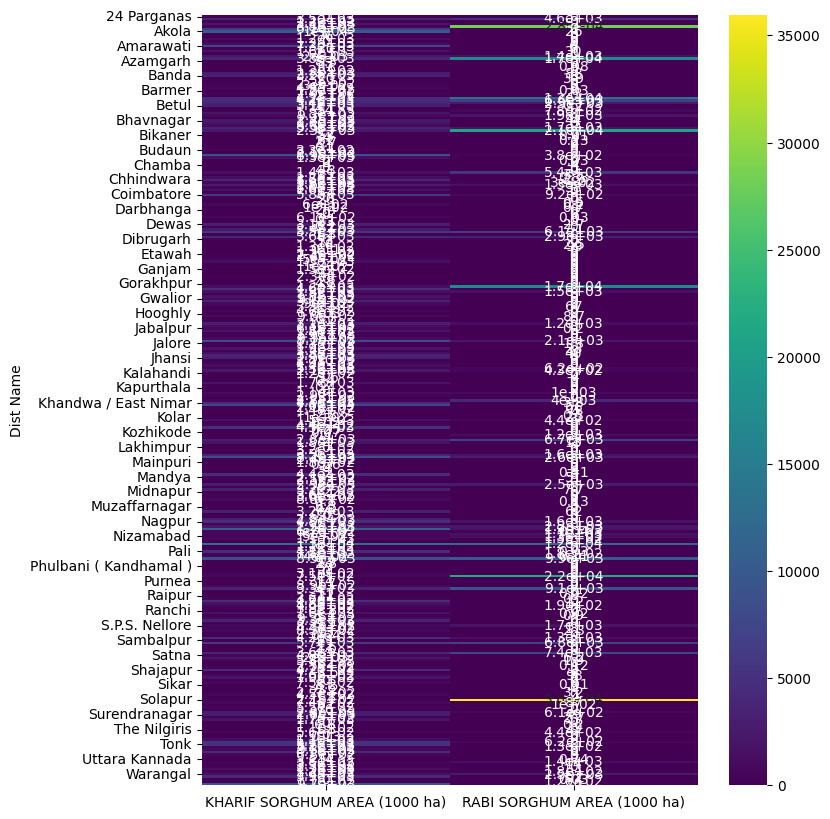

In [38]:
plt.figure(figsize=(8,10))
sns.heatmap(data=Planting_patterns_table,annot=True,cmap="viridis")
plt.show()

In [39]:
df.columns


Index(['Dist Code', 'Year', 'State Code', 'State Name', 'Dist Name',
       'RICE AREA (1000 ha)', 'RICE PRODUCTION (1000 tons)',
       'RICE YIELD (Kg per ha)', 'WHEAT AREA (1000 ha)',
       'WHEAT PRODUCTION (1000 tons)', 'WHEAT YIELD (Kg per ha)',
       'KHARIF SORGHUM AREA (1000 ha)',
       'KHARIF SORGHUM PRODUCTION (1000 tons)',
       'KHARIF SORGHUM YIELD (Kg per ha)', 'RABI SORGHUM AREA (1000 ha)',
       'RABI SORGHUM PRODUCTION (1000 tons)', 'RABI SORGHUM YIELD (Kg per ha)',
       'SORGHUM AREA (1000 ha)', 'SORGHUM PRODUCTION (1000 tons)',
       'SORGHUM YIELD (Kg per ha)', 'PEARL MILLET AREA (1000 ha)',
       'PEARL MILLET PRODUCTION (1000 tons)', 'PEARL MILLET YIELD (Kg per ha)',
       'MAIZE AREA (1000 ha)', 'MAIZE PRODUCTION (1000 tons)',
       'MAIZE YIELD (Kg per ha)', 'FINGER MILLET AREA (1000 ha)',
       'FINGER MILLET PRODUCTION (1000 tons)',
       'FINGER MILLET YIELD (Kg per ha)', 'BARLEY AREA (1000 ha)',
       'BARLEY PRODUCTION (1000 tons)', 'BARLEY 